In [ ]:
#Buisness Understanding:

#This dataset comes from a survey where people were asked about their coupon usage while driving to restaurants,
#bars, coffeehouses, and other places to eat. The goal is to understand why people decide to use or not use coupons 
#during their trips. This information is useful for restaurants and businesses to better understand what 
#customers prefer when it comes to using coupons.

In [ ]:
#Data understanding

#Source: The dataset was collected through a survey on Amazon Mechanical Turk.

#Features:

#Several features represent how frequently individuals visit different types of places, like bars, 
#coffeehouses, and restaurants.
#Some features capture driving distance and directions to restaurants/bars.
#The target variable "Y" indicates whether a coupon is accepted or not.

In [123]:
# Import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency


In [124]:
#Import the dataset CouponRecommendation

dataset = pd.read_csv('dataset/CouponRecommendation.csv')

#Show the first 5 lines of the dataset

dataset.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [125]:
#Data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [126]:
#Description of dataset
dataset.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


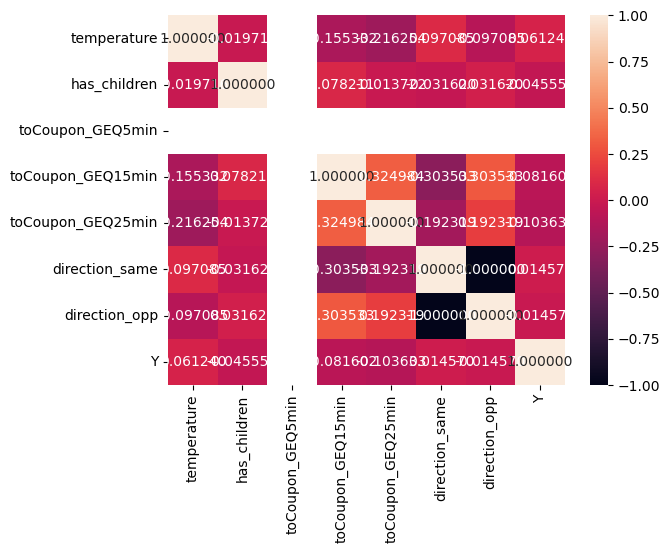

In [127]:
#To view the correlations between features, the higher it gets, the important it is.
dataset_corr=dataset.select_dtypes(include='int64').corr()
sns.heatmap(dataset_corr, annot=True, fmt="f")
plt.show()

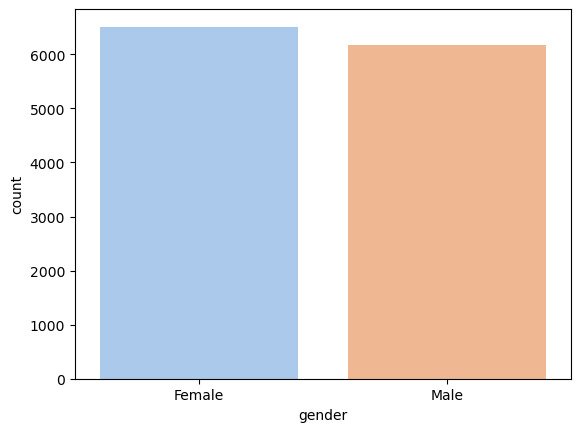

In [128]:
# Visualise the number of males and females in the data
#Observation: The number of males and females is mostly the same

sns.countplot(x="gender",data=dataset,palette="pastel")
plt.show()

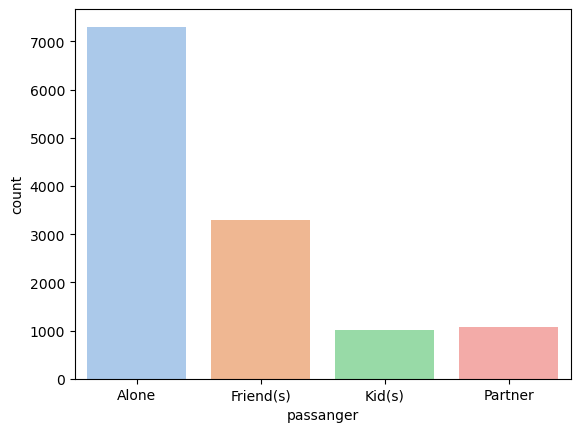

In [129]:
# Visualise the number of passengers if they are alone or no
#Observation: Most of the passengers are alone

sns.countplot(x="passanger",data=dataset,palette="pastel")
plt.show()

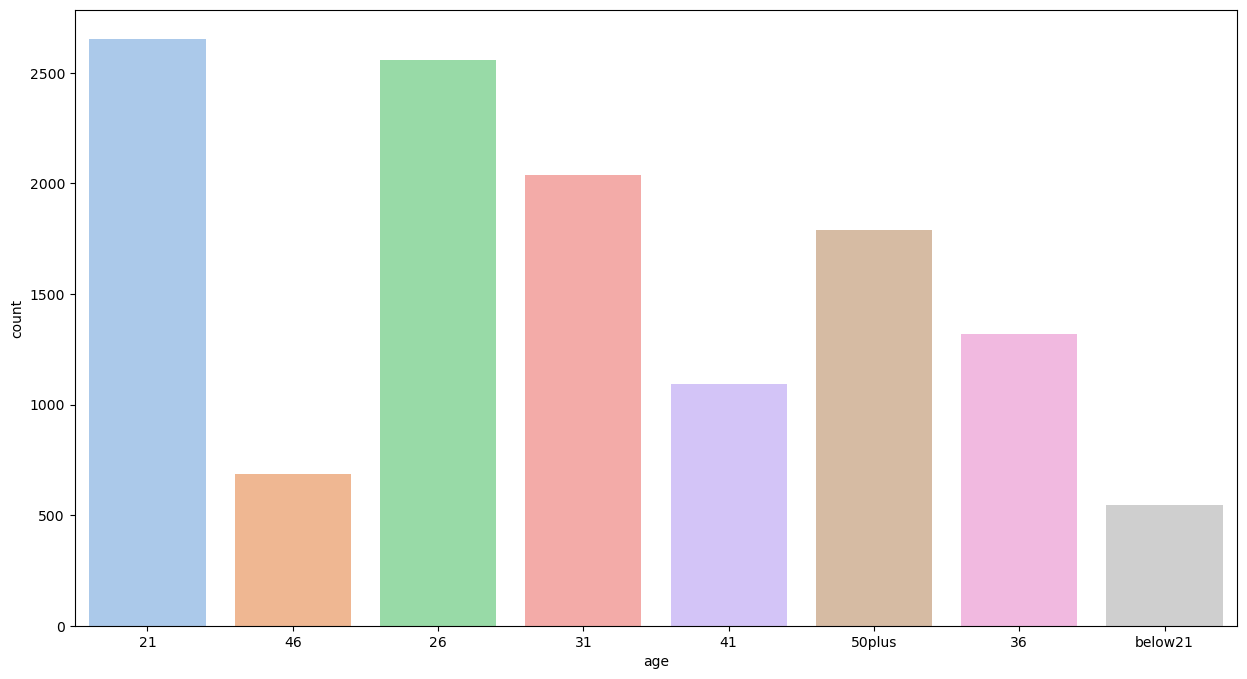

In [130]:
# Visualise the age distribution of customers

plt.figure(figsize=(15,8))
sns.countplot(x="age",data=dataset,palette="pastel")
plt.show()

In [131]:
# Calculate the count and percentage of accepted and rejected coupons

Y_counts = dataset.groupby('Y').Y.count()
print('Accepted coupon:',Y_counts[1],round(Y_counts[1]/dataset.shape[0]*100,3),'%')
print('Rejected coupon:',Y_counts[0],round(Y_counts[0]/dataset.shape[0]*100,3),'%')

Accepted coupon: 7210 56.843 %
Rejected coupon: 5474 43.157 %


In [132]:
# Display the feature names of the dataset

cols=dataset.columns
cols

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [133]:
# Print the unique values for each column in the dataset

for col in cols:
    print( col, dataset[col].unique() )

destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
temperature [55 80 30]
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children [1 0]
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 

In [134]:
# Remove duplicate rows from the dataset

shape = dataset.shape  
print("The dataset before the removal of duplicates",shape)
duplicate = dataset[dataset.duplicated(keep='last')]
dataset = dataset.drop_duplicates()
print("The dataset after the removal of duplicates:", dataset.shape)


The dataset before the removal of duplicates (12684, 26)
The dataset after the removal of duplicates: (12610, 26)


In [135]:
# This is to visualize how many missed values you have per feature and their percentage.

missing_values = dataset.isnull().sum()
missing_percentage = dataset.isnull().sum()*100/len(dataset)
missing_df = pd.DataFrame({'missing_sum': dataset.isnull().sum(),'missing_percentage': missing_percentage})
missing_df


,missing_sum,missing_percentage
destination,0,0.000000
passanger,0,0.000000
weather,0,0.000000
temperature,0,0.000000
time,0,0.000000
coupon,0,0.000000
expiration,0,0.000000
gender,0,0.000000
age,0,0.000000
maritalStatus,0,0.000000


In [136]:
# We noticed that feature "car " is all empty so better if we remove it

dataset.drop('car', axis=1, inplace=True)

In [137]:
# Data imputation for the missing values using the strategy most_frequent

dataset['Bar']=dataset['Bar'].fillna(dataset['Bar'].value_counts().index[0])
dataset['CoffeeHouse']=dataset['CoffeeHouse'].fillna(dataset['CoffeeHouse'].value_counts().index[0])
dataset['CarryAway']=dataset['CarryAway'].fillna(dataset['CarryAway'].value_counts().index[0])
dataset['RestaurantLessThan20']=dataset['RestaurantLessThan20'].fillna(dataset['RestaurantLessThan20'].value_counts().index[0])
dataset['Restaurant20To50']=dataset['Restaurant20To50'].fillna(dataset['Restaurant20To50'].value_counts().index[0])


In [138]:
# After the data imputation we can visualize that we don't have any missing values anymore.

missing_values = dataset.isnull().sum()
missing_percentage = dataset.isnull().sum()*100/len(dataset)
missing_df = pd.DataFrame({'missing_sum': dataset.isnull().sum(),'missing_percentage': missing_percentage})
missing_df

,missing_sum,missing_percentage
destination,0,0.0
passanger,0,0.0
weather,0,0.0
temperature,0,0.0
time,0,0.0
coupon,0,0.0
expiration,0,0.0
gender,0,0.0
age,0,0.0
maritalStatus,0,0.0


In [139]:
# Select and store all the features with numeric data types 

numeric_f = dataset.select_dtypes(include = np.number) 
numeric_f

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,55,1,1,0,0,0,1,1
1,80,1,1,0,0,0,1,0
2,80,1,1,1,0,0,1,1
3,80,1,1,1,0,0,1,0
4,80,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
12679,55,0,1,0,0,1,0,1
12680,55,0,1,0,0,0,1,1
12681,30,0,1,0,0,1,0,0
12682,30,0,1,1,1,0,1,0


In [140]:
# Calculate the number of unique values in each numeric feature.

numeric_f.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

In [141]:
# The feature toCoupon_GEQ5min shows a single value and no varience so it does not provide any information for our analysis.
# As a result it's not significant so we can drop it

dataset.drop(['toCoupon_GEQ5min'], axis=1, inplace=True)


In [142]:
# The feature toCoupon_GEQ5min is removed

numeric_f = dataset.select_dtypes(include = np.number) 
numeric_f

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,55,1,0,0,0,1,1
1,80,1,0,0,0,1,0
2,80,1,1,0,0,1,1
3,80,1,1,0,0,1,0
4,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...
12679,55,0,0,0,1,0,1
12680,55,0,0,0,0,1,1
12681,30,0,0,0,1,0,0
12682,30,0,1,1,0,1,0


In [143]:
# Correlation analysis between the features and the target variable 'Y'

correlation_results = []

def correlation(dataset, column, target_col):
    contigency = pd.crosstab(dataset[column], dataset[target_col])
    res = chi2_contingency(contigency)
    res_corr = 'Correlated' if res[1] < 0.05 else 'Not Correlated'
    p_val = res[1]
    return column, res_corr, p_val

target_variable = 'Y'

# Check which columns are correlated with 'Y' and storing them.

for col in dataset.columns:
    column, res_corr, p_val = correlation(dataset, col, target_variable)
    correlation_results.append([column, res_corr, p_val])

# Create a pandas DataFrame from the correlation results

corr_df = pd.DataFrame(correlation_results, columns=["Column", "Correlated?", "P-val"])     
corr_df

,Column,Correlated?,P-val
0,destination,Correlated,1.362619e-48
1,passanger,Correlated,3.086243e-48
2,weather,Correlated,1.491341e-29
3,temperature,Correlated,4.121985e-12
4,time,Correlated,9.898537e-38
5,coupon,Correlated,1.294073e-185
6,expiration,Correlated,2.967456e-47
7,gender,Correlated,9.889795e-07
8,age,Correlated,3.259976e-11
9,maritalStatus,Correlated,1.161226e-09


In [144]:
# We can see that  direction_same,direction_opp are not correlated with'Y' 
# As a result we can drop them

dataset.drop(['direction_opp','direction_same'], axis=1, inplace=True)

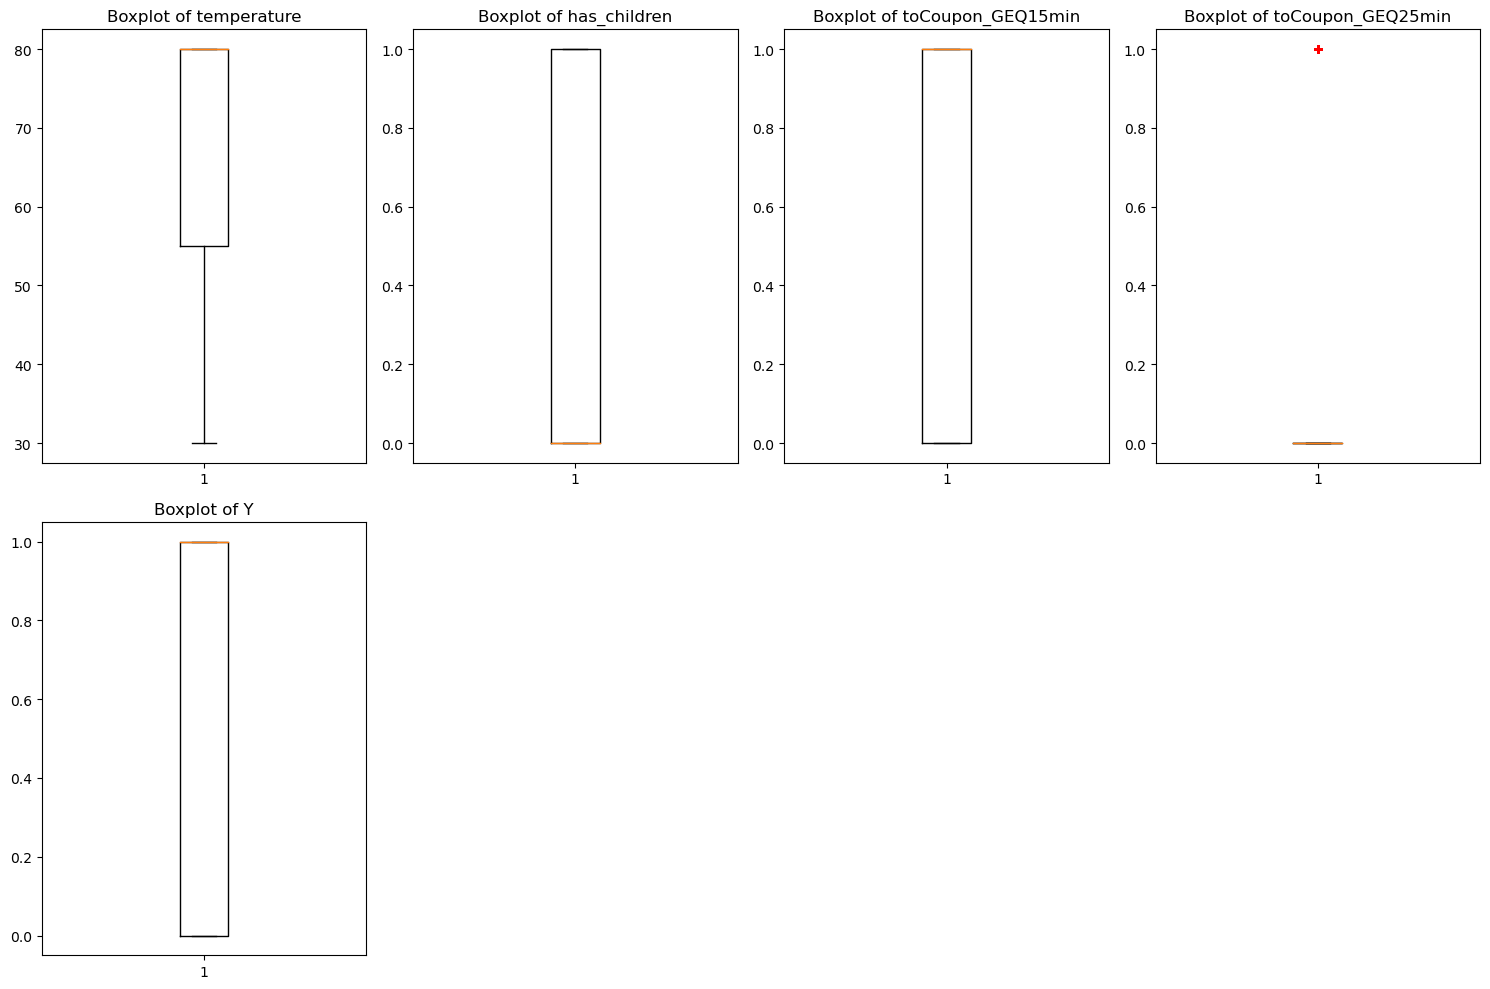

In [145]:
# Detect the outliers using the Boxplot method

# Select the numerical columns

numerical_columns = ['temperature', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'Y']

# Create a boxplot for each numerical column to detect the outliers

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 4, i + 1)
    plt.boxplot(dataset[column], sym='r+')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()



In [146]:
# We detected outliers in the column 'toCoupon_GEQ25min' 


In [147]:
# outlier_lims calculates upper and lower limits for identifying potential outliers 
#in a numerical data column using the IQR method.

def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

In [148]:
# Calculate and display outlier limits and percentage of outliers for 'toCoupon_GEQ25min' column 

col = 'toCoupon_GEQ25min'
print("--------------------------------------------------")
print("Column:", col)

UL, LL = outlier_lims(dataset[col])
print("Upper Limit =", UL)
print("Lower Limit =", LL)

total_outliers = len(dataset.loc[dataset[col] < LL, col]) + len(dataset.loc[dataset[col] > UL, col])
percent = (total_outliers / len(dataset.index)) * 100

print("Percentage of Outliers =", percent)
print("-------------------------------------------------- \n")

    

--------------------------------------------------
Column: toCoupon_GEQ25min
Upper Limit = 0.0
Lower Limit = 0.0
Percentage of Outliers = 11.601903251387787
-------------------------------------------------- 



In [149]:
# Cap outliers for toCoupon_GEQ25min

# Define upper and lower limits for each column

upper_limit_tcoup25 = 0.0  
lower_limit_tcoup25 = 0.0  

# Apply the upper and lower limits

dataset['toCoupon_GEQ25min'] = np.where(dataset['toCoupon_GEQ25min'] > upper_limit_tcoup25, upper_limit_tcoup25, dataset['toCoupon_GEQ25min'])
dataset['toCoupon_GEQ25min'] = np.where(dataset['toCoupon_GEQ25min'] < lower_limit_tcoup25, lower_limit_tcoup25, dataset['toCoupon_GEQ25min'])



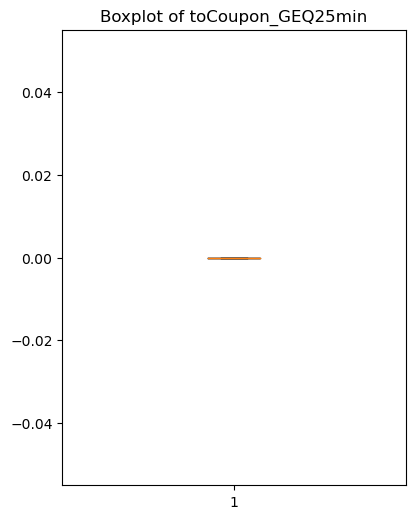

In [150]:
# Result after handling the outliers 

numerical_columns = ['toCoupon_GEQ25min']

# Create a boxplot for each numerical column 

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 4, i + 1)
    plt.boxplot(dataset[column], sym='r+')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [151]:
# Display the column names of the dataset

cols=dataset.columns
cols

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'Y'],
      dtype='object')

In [152]:
# Print unique values for each column in the dataset

for col in cols:
    print( col, dataset[col].unique() )

destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
temperature [55 80 30]
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children [1 0]
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 

In [153]:
#Apply feature engineering:
# occupation feature has 25 distinct values, which creates very sparsity in data after Encoding. 
# That's why we will create occupation_class where we categorize all occupation in its suitable class.

occupation_d = {'Healthcare Support':'High_Acceptance','Construction & Extraction':'High_Acceptance','Healthcare Practitioners & Technical':'High_Acceptance',
                   'Protective Service':'High_Acceptance','Architecture & Engineering':'High_Acceptance','Production Occupations':'Medium_High_Acceptance',
                    'Student':'Medium_High_Acceptance','Office & Administrative Support':'Medium_High_Acceptance','Transportation & Material Moving':'Medium_High_Acceptance',
                    'Building & Grounds Cleaning & Maintenance':'Medium_High_Acceptance','Management':'Medium_Acceptance','Food Preparation & Serving Related':'Medium_Acceptance',
                   'Life Physical Social Science':'Medium_Acceptance','Business & Financial':'Medium_Acceptance','Computer & Mathematical':'Medium_Acceptance',
                    'Sales & Related':'Medium_Low_Acceptance','Personal Care & Service':'Medium_Low_Acceptance','Unemployed':'Medium_Low_Acceptance',
                   'Farming Fishing & Forestry':'Medium_Low_Acceptance','Installation Maintenance & Repair':'Medium_Low_Acceptance','Education&Training&Library':'Low_Acceptance',
                    'Arts Design Entertainment Sports & Media':'Low_Acceptance','Community & Social Services':'Low_Acceptance','Legal':'Low_Acceptance','Retired':'Low_Acceptance'}

dataset['occupation_class'] = dataset['occupation'].map(occupation_d)
print('Unique values:',dataset['occupation_class'].unique())
print('-'*50)
dataset['occupation_class'].describe()

Unique values: ['Medium_Low_Acceptance' 'High_Acceptance' 'Medium_High_Acceptance'
 'Low_Acceptance' 'Medium_Acceptance']
--------------------------------------------------


count                     12610
unique                        5
top       Medium_Low_Acceptance
freq                       3300
Name: occupation_class, dtype: object

In [154]:
# Apply feature Enginnering: Creating to_Coupon which is combination of two features, toCoupon_GEQ15min and toCoupon_GEQ25min

to_Coupon = []
for i in range(dataset.shape[0]):
    if (list(dataset['toCoupon_GEQ15min'])[i] == 0):
        to_Coupon.append(0)
    elif (list(dataset['toCoupon_GEQ15min'])[i] == 1)and(list(dataset['toCoupon_GEQ25min'])[i] == 0):
        to_Coupon.append(1)
    else:
        to_Coupon.append(2)
        
dataset['to_Coupon'] = to_Coupon
print('Unique values:',dataset['to_Coupon'].unique())
print('-'*50)
dataset['to_Coupon'].describe()

Unique values: [0 1]
--------------------------------------------------


count    12610.000000
mean         0.559794
std          0.496432
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: to_Coupon, dtype: float64

In [155]:
# We can see the occupation_class and to_Coupon that we created as a new feature in the dataset

dataset.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'Y', 'occupation_class', 'to_Coupon'],
      dtype='object')

In [156]:
# We can now delete occupation column as we have new column occupation_class, 
#toCoupon_GEQ15min', 'toCoupon_GEQ15min as we created to_Coupon

dataset.drop(['occupation','toCoupon_GEQ25min', 'toCoupon_GEQ15min'],axis=1, inplace=True)
dataset.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'Y', 'occupation_class',
       'to_Coupon'],
      dtype='object')

In [157]:
# Making a list of categorical and numerical data

continuous_vars = dataset.select_dtypes(['int64', 'float64']).columns
print(continuous_vars)
categorical_vars=dataset.select_dtypes('object').columns
print(categorical_vars)

Index(['temperature', 'has_children', 'Y', 'to_Coupon'], dtype='object')
Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'occupation_class'],
      dtype='object')


In [158]:
#Exploring categorical variables

dataset.describe(include='object')

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,occupation_class
count,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610
unique,3,4,3,5,5,2,2,8,5,6,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,$25000 - $37499,never,less1,1~3,1~3,less1,Medium_Low_Acceptance
freq,6266,7248,10011,3220,3989,7031,6469,2642,5068,4325,2006,5285,3579,4795,5485,6230,3300


In [159]:
#Transforming categorical features into numerical ones using LabelEncoder

data=dataset.copy()
le = LabelEncoder()
object_features = dataset.select_dtypes(include=['object']).columns.tolist()
for i in object_features:
    data[i] = le.fit_transform(data[i])
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y,occupation_class,to_Coupon
0,1,0,2,55,2,4,0,0,0,3,...,5,3,4,4,0,1,0,1,4,0
1,1,1,2,80,0,2,1,0,0,3,...,5,3,4,4,0,1,0,0,4,0
2,1,1,2,80,0,1,1,0,0,3,...,5,3,4,4,0,1,0,1,4,1
3,1,1,2,80,2,2,1,0,0,3,...,5,3,4,4,0,1,0,0,4,1
4,1,1,2,80,2,2,0,0,0,3,...,5,3,4,4,0,1,0,0,4,1


In [160]:
# Transform numerical features using standardization (Z-score scaling)
# to ensure they have a mean of 0 and a standard deviation of 1

std_scaler = StandardScaler()
cols = list(continuous_vars)
data[cols] = std_scaler.fit_transform(data[cols])

data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y,occupation_class,to_Coupon
0,1,0,2,-0.431651,2,4,0,0,0,3,...,5,3,4,4,0,1,0,0.872875,4,-1.127680
1,1,1,2,0.873653,0,2,1,0,0,3,...,5,3,4,4,0,1,0,-1.145639,4,-1.127680
2,1,1,2,0.873653,0,1,1,0,0,3,...,5,3,4,4,0,1,0,0.872875,4,0.886776
3,1,1,2,0.873653,2,2,1,0,0,3,...,5,3,4,4,0,1,0,-1.145639,4,0.886776
4,1,1,2,0.873653,2,2,0,0,0,3,...,5,3,4,4,0,1,0,-1.145639,4,0.886776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,-0.431651,3,1,0,1,1,2,...,1,6,4,4,0,1,0,0.872875,4,-1.127680
12680,2,0,0,-0.431651,4,1,0,1,1,2,...,1,6,4,4,0,1,0,0.872875,4,-1.127680
12681,2,0,1,-1.736955,4,2,0,1,1,2,...,1,6,4,4,0,1,0,-1.145639,4,-1.127680
12682,2,0,1,-1.736955,4,0,0,1,1,2,...,1,6,4,4,0,1,0,-1.145639,4,0.886776


In [161]:
# After the transformation we can see that:
# for numerical features : The mean value is close to 0, indicating that the data has been centered
# and the standard deviation value is close to 1
# for categorical features: since we encoded them using label encoding, they will now have integer values. 

data.describe()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y,occupation_class,to_Coupon
count,12610.000000,12610.000000,12610.000000,1.261000e+04,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,...,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,1.261000e+04,12610.000000,1.261000e+04
mean,0.990801,0.674148,1.698573,-1.803122e-16,2.230531,2.054084,0.442427,0.486994,2.596114,1.710944,...,2.589294,3.300397,2.634496,2.102617,1.073830,1.047264,2.254877,4.057024e-17,2.371768,-4.958585e-17
std,0.709259,0.941886,0.633438,1.000040e+00,1.438425,1.349154,0.496694,0.499851,2.225206,0.833673,...,1.883092,2.459379,1.553865,1.537467,1.092961,1.160928,1.481930,1.000040e+00,1.275486,1.000040e+00
min,0.000000,0.000000,0.000000,-1.736955e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.145639e+00,0.000000,-1.127680e+00
25%,0.000000,0.000000,2.000000,-4.316509e-01,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.145639e+00,1.000000,-1.127680e+00
50%,1.000000,0.000000,2.000000,8.736531e-01,3.000000,2.000000,0.000000,0.000000,2.000000,2.000000,...,2.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,8.728754e-01,2.000000,8.867762e-01
75%,1.000000,1.000000,2.000000,8.736531e-01,3.000000,3.000000,1.000000,1.000000,4.000000,2.000000,...,5.000000,5.000000,4.000000,3.000000,2.000000,2.000000,3.000000,8.728754e-01,4.000000,8.867762e-01
max,2.000000,3.000000,2.000000,8.736531e-01,4.000000,4.000000,1.000000,1.000000,7.000000,4.000000,...,5.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,8.728754e-01,4.000000,8.867762e-01


In [162]:
# Also we can see that we have numerical data only in our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12610 non-null  int32  
 1   passanger             12610 non-null  int32  
 2   weather               12610 non-null  int32  
 3   temperature           12610 non-null  float64
 4   time                  12610 non-null  int32  
 5   coupon                12610 non-null  int32  
 6   expiration            12610 non-null  int32  
 7   gender                12610 non-null  int32  
 8   age                   12610 non-null  int32  
 9   maritalStatus         12610 non-null  int32  
 10  has_children          12610 non-null  float64
 11  education             12610 non-null  int32  
 12  income                12610 non-null  int32  
 13  Bar                   12610 non-null  int32  
 14  CoffeeHouse           12610 non-null  int32  
 15  CarryAway             12

In [163]:
#Applying Dimensionality reduction :PCA

data = pd.DataFrame(data)

#1: Calculating the covariance matrix
cov_matrix = np.cov(data, rowvar=False)

#2: Performing PCA
pca = PCA()
pca.fit(data)

#3: Getting eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

#4: Choosing the number of principal components to retain using Kaiser's method
eigenvalues = pca.explained_variance_

# Calculating the number of components with eigenvalues greater than 1
num_components = len([ev for ev in eigenvalues if ev > 1])

#5: Projecting the data onto the retained components
data_pca = pca.transform(data)[:, :num_components]
data_pca = data_pca[:, :num_components]

# The result dataset after applying PCA
data_df = pd.DataFrame(data_pca, columns=data.columns[:num_components])
data_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,income
0,-0.762945,-1.644410,2.783726,-0.360321,0.091567,0.676617,-1.756843,3.683945,-1.278915,-0.452530,0.148577,-0.424029,0.048031
1,-0.734953,-1.579790,2.729203,-0.584288,2.448632,1.267584,-0.255620,3.389241,-1.173766,-0.777473,-0.554763,-0.315803,-0.752507
2,-0.755528,-1.589609,2.713637,-0.373621,2.627622,1.422606,0.787940,3.261701,-1.036602,-0.523852,-0.284849,-0.840017,-0.647023
3,-0.737013,-1.561300,2.696063,-0.644184,0.637128,1.393888,0.257212,3.496323,-0.999109,-0.878979,0.344939,-0.934781,-0.638150
4,-0.735012,-1.563494,2.700681,-0.645847,0.609719,1.411732,0.309477,3.494083,-1.001288,-0.857642,0.306958,-0.918322,-0.621508


In [164]:
data.to_csv('CouponRecommendation_cleaned.csv', index=False)
